<a href="https://colab.research.google.com/github/iffyaiyan/airbnb-Seatle/blob/master/Seattle_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the datasets

In [0]:
listings_df = pd.read_csv("/content/listings.csv")
calendar_df = pd.read_csv("/content/calendar.csv")
reviews_df = pd.read_csv("/content/reviews.csv")

Let's try to get the insights from the above datasets file

In [70]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883.0,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2.0,$5.00,1.0,365.0,4 weeks ago,t,14.0,41.0,71.0,346.0,2016-01-04,207.0,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2.0,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328.0,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1.0,$0.00,2.0,90.0,today,t,13.0,13.0,16.0,291.0,2016-01-04,43.0,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6.0,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is ju

In [71]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [72]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Let's count the no of rows and columns in calendar and review and listings data

In [73]:
print("No of rows and column in reviw dataset")
print("Total No of Columns: ", reviews_df.shape[1])
print("Total No of Rows: ", reviews_df.shape[0])

No of rows and column in reviw dataset
Total No of Columns:  6
Total No of Rows:  84849


In [74]:
print("No of rows and columns in Calendar dataset")
print("Total No of Columns: ", calendar_df.shape[1])
print("Total No of Rows: ", calendar_df.shape[0])

No of rows and columns in Calendar dataset
Total No of Columns:  4
Total No of Rows:  1393570


In [75]:
print("No of rows and columns in listings dataset")
print("Total No of Columns: ", listings_df.shape[1])
print("Total No of Rows: ", listings_df.shape[0])

No of rows and columns in listings dataset
Total No of Columns:  92
Total No of Rows:  714


Now we know the no rows and columns in the above datasets 
Let's try to get more information about these datasets 

In [76]:
# Describing the listings_df dataset
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,7.140000e+02,7.140000e+02,7.130000e+02,713.000000,713.000000,711.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,24.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,600.000000,598.000000,600.000000,599.000000,600.000000,599.000000,598.000000,0.0,713.000000,605.000000
mean,5.439491e+06,2.016010e+13,1.520218e+07,5.098177,5.098177,98110.527426,47.649366,-122.342026,3.604488,1.309958,1.482468,1.880785,1065.791667,1.887798,2.227209,753.683029,15.802244,34.704067,55.023843,242.492286,22.946704,95.100000,9.698997,9.585000,9.804674,9.858333,9.699499,9.513378,NaN,2.845722,2.031008
std,2.945157e+06,0.000000e+00,1.411527e+07,27.085309,27.085309,6.925277,0.021345,0.027979,2.164079,0.626542,0.981594,1.300857,776.291349,1.626252,2.319069,506.937276,12.404416,23.905906,34.798670,124.033569,34.664321,5.317938,0.623143,0.737347,0.554922,0.471134,0.529892,0.708164,NaN,6.577224,1.796935
min,6.606000e+03,2.016010e+13,1.494200e+04,1.000000,1.000000,98101.000000,47.602795,-122.397338,1.000000,0.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,6.000000,6.000000,4.000000,4.000000,8.000000,4.000000,NaN,1.000000,0.030000
25%,3.195465e+06,2.016010e+13,3.074414e+06,1.000000,1.000000,98105.000000,47.633767,-122.365652,2.000000,1.000000,1.000000,1.000000,476.250000,1.000000,1.000000,45.000000,0.000000,5.000000,21.000000,125.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.650000
50%,5.718196e+06,2.016010e+13,1.006144e+07,1.000000,1.000000,98109.000000,47.651586,-122.341800,3.000000,1.000000,1.000000,1.000000,925.000000,1.000000,2.000000,1125.000000,19.000000,43.000000,68.000000,303.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.460000
75%,7.922296e+06,2.016010e+13,2.442994e+07,2.000000,2.000000,98119.000000,47.668354,-122.325972,4.000000,1.500000,2.000000,2.000000,1650.000000,2.000000,2.000000,1125.000000,29.000000,59.000000,88.000000,358.000000,30.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,2.880000
max,1.031037e+07,2.016010e+13,5.305038e+07,354.000000,354.000000,98122.000000,47.690449,-122.282043,16.000000,4.500000,6.000000,15.000000,3000.000000,15.000000,30.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,244.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [77]:
# Getting the information about the listings_df datasets to understand the datatypes and how many of them are having any null vaues
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                714 non-null    int64  
 1   listing_url                       714 non-null    object 
 2   scrape_id                         714 non-null    int64  
 3   last_scraped                      714 non-null    object 
 4   name                              714 non-null    object 
 5   summary                           681 non-null    object 
 6   space                             615 non-null    object 
 7   description                       714 non-null    object 
 8   experiences_offered               714 non-null    object 
 9   neighborhood_overview             548 non-null    object 
 10  notes                             403 non-null    object 
 11  transit                           554 non-null    object 
 12  thumbnai

In [78]:
# Counting the no of columns having missing values 
sum(listings_df.isnull().any())

84

In [79]:
# No of columns that have missing values in listings datasets
listings_df.columns[listings_df.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url'],
      dtype='object')

In [80]:
# No of columns that have more than 75% missing dataset
listings_df.columns[listings_df.isnull().mean() > 0.75]

Index(['square_feet', 'license'], dtype='object')

In [81]:
# No of columns that have more than 50% missing dataset
listings_df.columns[listings_df.isnull().mean() > 0.5]

Index(['square_feet', 'monthly_price', 'license'], dtype='object')

In [82]:
# No of columns that don't have missing values
sum(listings_df.notnull().all())

8

In [83]:
# Name of the columns that have missing value 0
not_null_columns = listings_df.columns[listings_df.isnull().mean() == 0]
not_null_columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url'],
      dtype='object')

In [84]:
# Columns with having any missing values
null_columns = listings_df.columns[listings_df.isnull().any()]
null_columns

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_incl

In [85]:
# Now let's explore the no of categorical and numerical columns in the datasets
# No of categorical columns
Categorical_Features = listings_df.select_dtypes(include = ['object']) #.shape[1])
Categorical_Features.shape[1]

61

In [86]:
# Counting the numeric columns 
Numeric_Features = listings_df.select_dtypes(include = ['int', 'float'])
Numeric_Features.shape[1]

31

In [87]:
# Getting the name of the Categorical Features
Categorical_Features.columns


Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'f

Now Cleaning Price and other money related column

In [0]:
# Cleaning (replace '$) and formating price-related columns
listings_df.price = listings_df.price.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.monthly_price = listings_df.monthly_price.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.weekly_price = listings_df.weekly_price.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.security_deposit = listings_df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.cleaning_fee = listings_df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
listings_df.extra_people = listings_df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

# Question 1- Analysing Room Types, Their Percentage and Price range on Airbnb



In [89]:
# Checking suspiciously low prices
print(listings_df[(['price', 'name'])][listings_df.price<20])

Empty DataFrame
Columns: [price, name]
Index: []


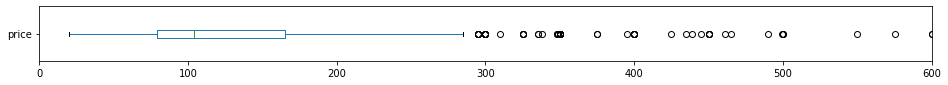

In [90]:
# Checking suspiciously high prices 
listings_df['price'].plot(kind = 'box', xlim = (0,600),vert = False, figsize = (16,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe796ebcc50>,
      dtype=object)

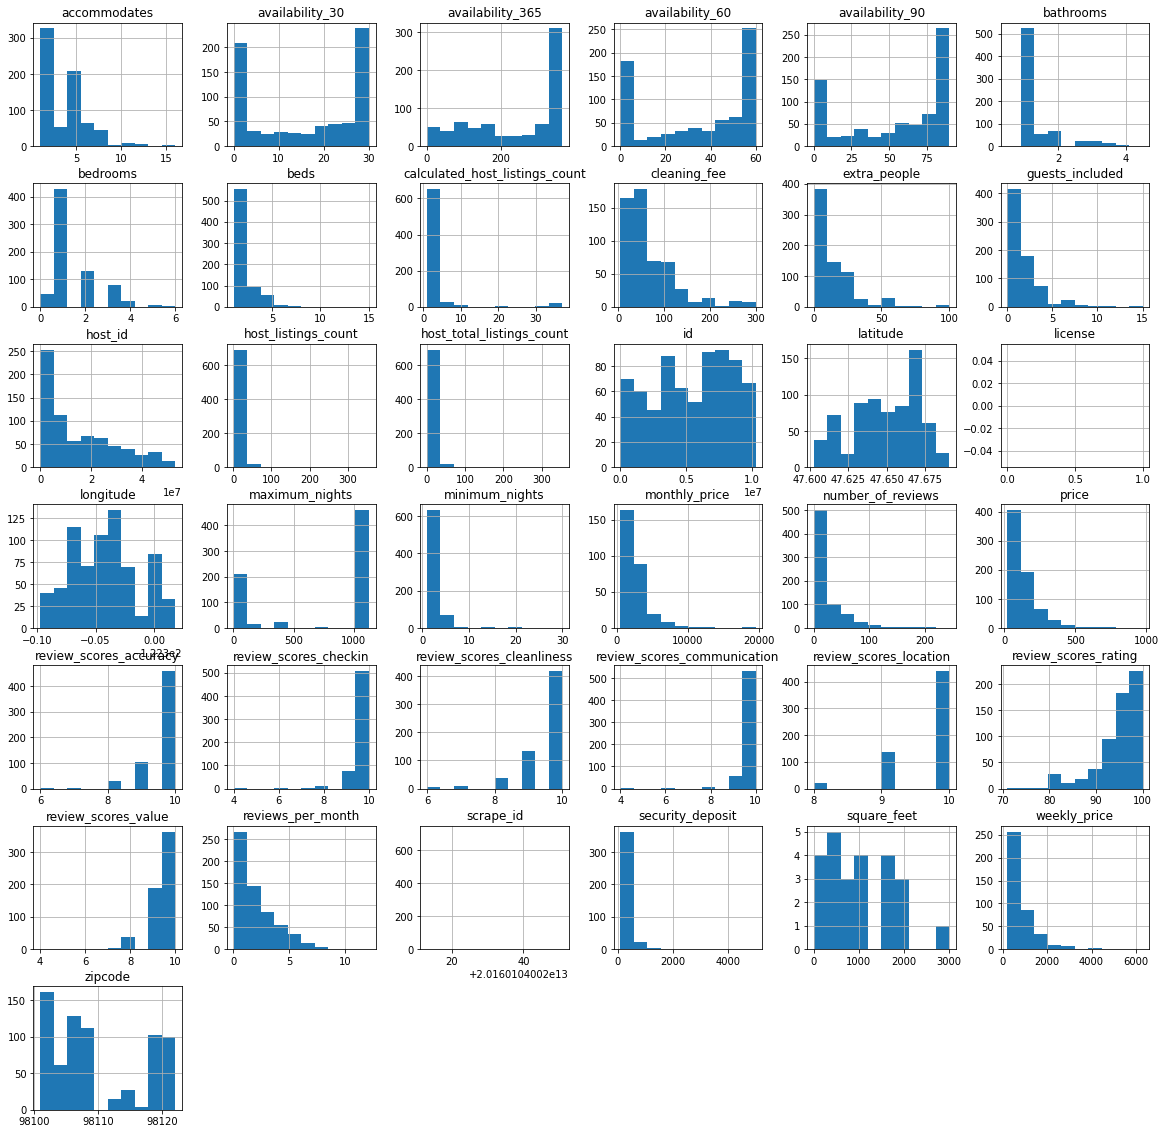

In [91]:
# histogram of listing data columns
listings_df.hist(figsize = (20,20),)

What conclusion we can draw from the above histograms
1. Very few have rent above \$1000 and mostly have their rent below \$200
2. Also weekly price for Airbnb Seattle is mostly less than \$1100 but in some cases it shoorts upto \$5000
3. We can see from availability_365 histogram that rooms are highly available at the end of year

In [92]:
# let calculate the proportion of room type values in listings_df dataset
room = listings_df.room_type.value_counts()
room

Entire home/apt    488
Private room       203
Shared room         22
Name: room_type, dtype: int64

We can see we have 3 types of room available at AirBnB Seattle

In [93]:
# Calculating the proportion of each type room available at AirBnB Seattle
print("Proportion of Room Types")
percentages = room/listings_df.shape[0]
print(percentages)

Proportion of Room Types
Entire home/apt    0.683473
Private room       0.284314
Shared room        0.030812
Name: room_type, dtype: float64


In [94]:
# mean prices per night for each room type
mean_price_per_night = listings_df.groupby('room_type').mean()['price']
mean_price_per_night

room_type
Entire home/apt    173.057377
Private room        75.655172
Shared room         41.818182
Name: price, dtype: float64

From the above analysis we can see that opting for home/apt is much costlier than Private or Shared room

# Question 2: Analysing Room Availability and Best Time to visit Seattle using month of the year and price



In [95]:
# Using the calendar_df datasets
# Checking if there is any null columns in calendar_df datasets
calendar_df.columns[calendar_df.isnull().any()]

Index(['price'], dtype='object')

In [96]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [97]:
# availability of listings
calendar_df.available.value_counts()/calendar_df.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

In [0]:
# Convert datetime object to datetime
calendar_df['Datetime'] = pd.to_datetime(calendar_df['date'], format = "%Y/%m/%d")

In [0]:
# Picking only the monthly column 
calendar_df['month'] = pd.DatetimeIndex(calendar_df['Datetime']).month

In [0]:
calendar_df['Month'] = calendar_df['Datetime'].dt.strftime('%b')

In [101]:
# Let's group only available data by month
availability_room_by_month = calendar_df[calendar_df['available'] == 't'].groupby(['Month']).count()['listing_id'].sort_values(ascending = False)
availability_room_by_month

Month
Dec    87061
Mar    83938
Oct    82438
Nov    81780
May    79971
Sep    77246
Jun    77244
Aug    76347
Apr    76037
Jul    74222
Feb    73321
Jan    64937
Name: listing_id, dtype: int64

We can see most of the room  are available at the last 4 month of the year which we already noticed while plotting the histograms above

Text(0.5, 1.0, 'availability by month')

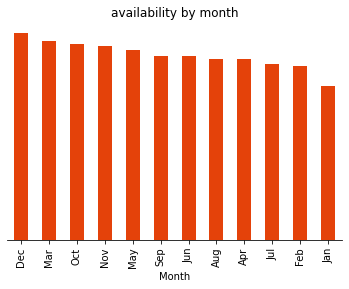

In [102]:
# bar graph of availability by month
fig, ax = plt.subplots(1)
ax.set_yticklabels([])  # Leaving the y tick lable blank
ax.tick_params(axis = 'y', which = 'both', length = 0)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

(availability_room_by_month).plot(kind = 'bar', color = '#e4420a')

plt.title("availability by month")

In [0]:
# Converting price string using the fuction defined above

calendar_df.price = calendar_df.price.str.replace('$', '').str.replace(',', '').astype(float)


In [104]:
# Grouping by month the mean price
mean_price_per_month = calendar_df.groupby(['Month']).mean()['price'].sort_values(ascending = False)
mean_price_per_month

Month
Jul    152.094150
Aug    150.656594
Jun    147.473137
Sep    143.255949
May    139.538183
Dec    137.251835
Oct    137.031939
Nov    135.688738
Apr    135.097005
Mar    128.644488
Feb    124.293927
Jan    122.912176
Name: price, dtype: float64

We can see mean price is highest in July and then followed by Aug, June ...

In [0]:
def bar_plot(var,title):
    
    fig,ax = plt.subplots(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    var.plot(kind="bar",color='#e4420a');
    plt.title(title);

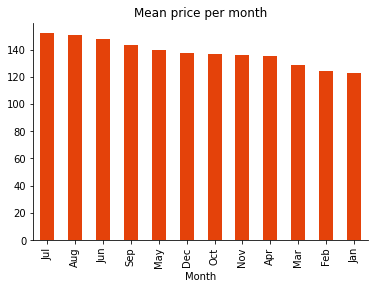

In [106]:
# plotting the bar graph for mean price per month
bar_plot(mean_price_per_month, "Mean price per month")

In [0]:
reviews_df['datetime'] = pd.to_datetime(reviews_df['date'], format = "%Y/%m/%d")

In [0]:
reviews_df['month'] = pd.DatetimeIndex(reviews_df['datetime']).month

In [0]:
reviews_df['Month'] = reviews_df['datetime'].dt.strftime('%b')

In [110]:

comments_per_month = reviews_df.groupby(['Month']).count()['comments'].sort_values(ascending=False)
comments_per_month

Month
Aug    13017
Sep    11675
Jul    10501
Oct     8954
Jun     8542
Nov     6665
May     5853
Dec     5730
Apr     4231
Mar     4157
Jan     2864
Feb     2642
Name: comments, dtype: int64

We can notice that there is lots of review in the month of August

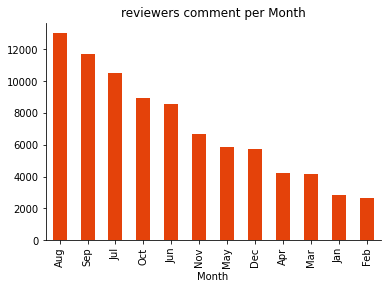

In [111]:
# plotting bargraph of comments per month
bar_plot(comments_per_month, "reviewers comment per Month")

One can see most of the reviews are in the month of July, August and Septempber which means people are most likely to visit Seattle during this months


# Question 3: Neighbourhood Price Analysis

In [0]:
# grouped by neighbourhood on yhe basis of their mean price
neighbour_price = listings_df.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values(ascending = False)

In [120]:
neighbour_price

neighbourhood_group_cleansed
Cascade                194.470588
Queen Anne             166.515000
Central Area           142.807018
Other neighborhoods    133.461538
Ballard                122.947761
University District     69.296296
Name: price, dtype: float64

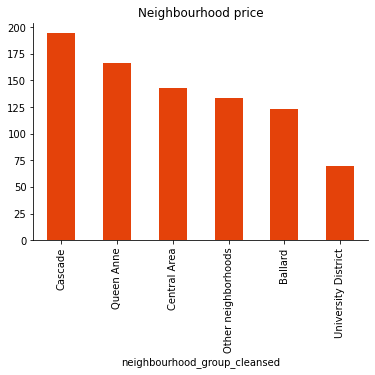

In [121]:
# bar graph for the neighbourhood_price
bar_plot(neighbour_price, "Neighbourhood price")

In [123]:
# grouped by neighbourhood on yhe basis of their review score location
neighbour_review_scores_location = listings_df.groupby('neighbourhood_group_cleansed').mean()['review_scores_location'].sort_values(ascending = False)
neighbour_review_scores_location

neighbourhood_group_cleansed
Other neighborhoods    9.793651
Ballard                9.765766
Queen Anne             9.697674
Cascade                9.600000
Central Area           9.505263
University District    9.454545
Name: review_scores_location, dtype: float64

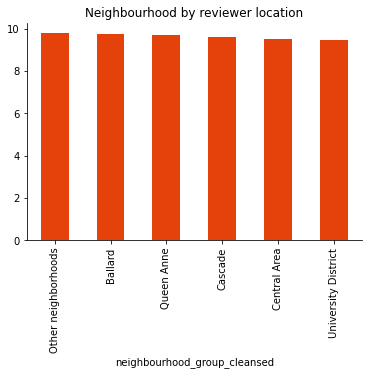

In [124]:
# Plotting the bar graph
bar_plot(neighbour_review_scores_location, "Neighbourhood by reviewer location")

In [126]:
# grouped by neighbourhood on yhe basis of their review score rating
neighbour_review_score_rating = listings_df.groupby('neighbourhood_group_cleansed').mean()['review_scores_rating'].sort_values(ascending = False)
neighbour_review_score_rating

neighbourhood_group_cleansed
Cascade                96.500000
Central Area           95.968421
Queen Anne             95.554913
Ballard                95.261261
Other neighborhoods    94.465608
University District    91.772727
Name: review_scores_rating, dtype: float64

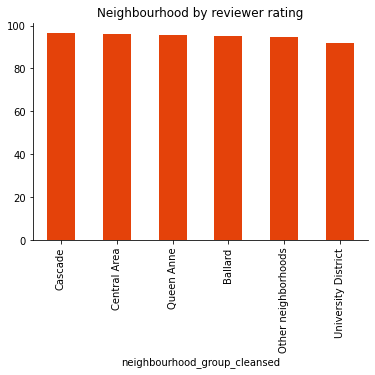

In [128]:
# Plotting the bar graph
bar_plot(neighbour_review_score_rating, "Neighbourhood by reviewer rating")

We can say that Cascade is the most expensive place